In [1]:
from O.MM.sc_system import *


In [2]:
'''
the main TODO is to make a tutorial

over time this will be added
''';

In [2]:
import shutil
from pathlib import Path

class NEW_PROJECT:
    def __init__(self, name):
        self.name = name
        
        self.folders = {
        'main' : f'./O/MM/molecules/{name}',
        'misc' : f'./O/MM/molecules/{name}/misc',
        'temp' : f'./O/MM/molecules/{name}/temp',
        'data' : f'./O/MM/molecules/{name}/data',
        'NPT'  : f'./O/MM/molecules/{name}/data/NPT',
        }
        for folder in self.folders.values():
            if os.path.exists(folder): pass
            else:
                os.mkdir(folder)
                print(f'created folder: {folder}')
        
        self.files = {
            'single_mol_main' : f'./O/MM/molecules/{name}/{name}_single_mol.pdb',      # should be 
            'single_mol_misc' : f'./O/MM/molecules/{name}/misc/{name}_single_mol.pdb', # identical
        }
            
        try: 
            self.n_atoms_mol = mdtraj.load(self.files['single_mol_main']).n_atoms
        except:
            print('next: please run add_single_molecule_pdb_(PDB_single_mol)')

    def check_unitcells_(self,):
        a_unitcell_found = False
        for item in Path(self.folders['main']).iterdir():
            if 'unitcell' in item.name:
                a_unitcell_found = True
            else: pass
        if a_unitcell_found: pass
        else: print('next: please run add_unitcell_(PDB_unitcell, form_name)')
            
    def add_single_molecule_pdb_(self, PDB_single_mol:str):
        
        traj = mdtraj.load(PDB_single_mol)
        traj.save_pdb(f'./O/MM/molecules/{self.name}/temp/{self.name}_single_mol_temp.pdb')

        self.n_atoms_mol = traj.n_atoms
        print(f'n_atoms_mol = {self.n_atoms_mol}')

        # convert multiframe pdb (default from mdtraj) to single frame
        pdb_in = open(f'./O/MM/molecules/{self.name}/temp/{self.name}_single_mol_temp.pdb', 'r')
        pdb_out = open(self.files['single_mol_misc'], 'w')
        
        for line in pdb_in:
            if 'TER' in line or 'ENDMDL' in line: pass
            else: pdb_out.write(line)
        pdb_out.close()

        shutil.copy2(self.files['single_mol_misc'], self.files['single_mol_main'])   

        assert mdtraj.load(self.files['single_mol_main']).n_atoms == self.n_atoms_mol
        
        # check if a unitcell was added:
        self.check_unitcells_()

    def add_unitcell_(self, PDB_unitcell:str, form_name:str):
        self.files[form_name+'_unitcell_temp'] = f'./O/MM/molecules/{self.name}/{self.name}_{form_name}_unitcell_temp.pdb'
        self.files[form_name+'_unitcell'] = f'./O/MM/molecules/{self.name}/{self.name}_{form_name}_unitcell.pdb'

        traj = mdtraj.load(PDB_unitcell)
        traj.save_pdb(self.files[form_name+'_unitcell_temp'])
        
        reorder_atoms_unitcell_(PDB     = self.files[form_name+'_unitcell_temp'],
                                PDB_ref = self.files['single_mol_main'],
                                n_atoms_mol=self.n_atoms_mol,
                               )
        
        shutil.copy2(f'./O/MM/molecules/{self.name}/{self.name}_{form_name}_unitcell_temp_reordered.pdb', 
                     self.files[form_name+'_unitcell'])  

        print(f"file saved: {self.files[form_name+'_unitcell']}")


In [9]:
TEST_single_mol = '''
REMARK   1 CREATED WITH MDTraj 1.10.3, 2025-11-19
CRYST1   25.000   25.000   25.000  90.00  90.00  90.00 P 1           1 
MODEL        0
ATOM      1  C   MOL A   1      13.392  11.423  12.647  1.00  0.00           C  
ATOM      2  C   MOL A   1      11.623  13.571  12.361  1.00  0.00           C  
ATOM      3  C   MOL A   1      13.756  12.694  13.102  1.00  0.00           C  
ATOM      4  C   MOL A   1      11.258  12.300  11.906  1.00  0.00           C  
ATOM      5  C   MOL A   1      12.872  13.768  12.959  1.00  0.00           C  
ATOM      6  C   MOL A   1      12.143  11.225  12.049  1.00  0.00           C  
ATOM      7  H   MOL A   1      14.077  10.591  12.758  1.00  0.00           H  
ATOM      8  H   MOL A   1      10.938  14.403  12.251  1.00  0.00           H  
ATOM      9  H   MOL A   1      14.723  12.847  13.565  1.00  0.00           H  
ATOM     10  H   MOL A   1      10.291  12.147  11.443  1.00  0.00           H  
ATOM     11  H   MOL A   1      13.154  14.752  13.312  1.00  0.00           H  
ATOM     12  H   MOL A   1      11.861  10.241  11.696  1.00  0.00           H  
TER      13      MOL A   1
ENDMDL
END

'''

TEST_unitcell = '''
REMARK   1 CREATED WITH MDTraj 1.10.1, 2025-10-17
CRYST1    7.482    9.276    6.961  90.00  90.00  90.00 P 1           1 
MODEL        0
ATOM      1  C   MOL A   1       7.027   1.319   6.877  1.00  0.00           C  
ATOM      2  C   MOL A   1       6.459   0.435   7.802  1.00  0.00           C  
ATOM      3  C   MOL A   1       8.051   0.882   6.028  1.00  0.00           C  
ATOM      4  C   MOL A   1       6.921  -0.885   7.879  1.00  0.00           C  
ATOM      5  C   MOL A   1       8.513  -0.438   6.106  1.00  0.00           C  
ATOM      6  C   MOL A   1       7.945  -1.322   7.031  1.00  0.00           C  
ATOM      7  H   MOL A   1       6.675   2.343   6.816  1.00  0.00           H  
ATOM      8  H   MOL A   1       5.659   0.763   8.456  1.00  0.00           H  
ATOM      9  H   MOL A   1       8.484   1.561   5.305  1.00  0.00           H  
ATOM     10  H   MOL A   1       6.488  -1.564   8.602  1.00  0.00           H  
ATOM     11  H   MOL A   1       9.313  -0.766   5.451  1.00  0.00           H  
ATOM     12  H   MOL A   1       8.297  -2.346   7.092  1.00  0.00           H  
TER      13      MOL A   1
ATOM     14  C   MOL B   1       3.180   5.520   6.028  1.00  0.00           C  
ATOM     15  C   MOL B   1       4.204   5.957   6.877  1.00  0.00           C  
ATOM     16  C   MOL B   1       2.718   4.200   6.106  1.00  0.00           C  
ATOM     17  C   MOL B   1       4.772   5.073   7.802  1.00  0.00           C  
ATOM     18  C   MOL B   1       3.286   3.316   7.031  1.00  0.00           C  
ATOM     19  C   MOL B   1       4.310   3.753   7.879  1.00  0.00           C  
ATOM     20  H   MOL B   1       2.747   6.200   5.305  1.00  0.00           H  
ATOM     21  H   MOL B   1       4.556   6.981   6.816  1.00  0.00           H  
ATOM     22  H   MOL B   1       1.918   3.872   5.451  1.00  0.00           H  
ATOM     23  H   MOL B   1       5.572   5.401   8.456  1.00  0.00           H  
ATOM     24  H   MOL B   1       2.934   2.292   7.092  1.00  0.00           H  
ATOM     25  H   MOL B   1       4.743   3.074   8.602  1.00  0.00           H  
TER      26      MOL B   1
ATOM     27  C   MOL C   1       8.051   3.753   2.548  1.00  0.00           C  
ATOM     28  C   MOL C   1       7.027   3.316   3.396  1.00  0.00           C  
ATOM     29  C   MOL C   1       8.513   5.073   2.625  1.00  0.00           C  
ATOM     30  C   MOL C   1       6.459   4.200   4.322  1.00  0.00           C  
ATOM     31  C   MOL C   1       7.945   5.957   3.550  1.00  0.00           C  
ATOM     32  C   MOL C   1       6.921   5.520   4.399  1.00  0.00           C  
ATOM     33  H   MOL C   1       8.484   3.074   1.825  1.00  0.00           H  
ATOM     34  H   MOL C   1       6.675   2.292   3.335  1.00  0.00           H  
ATOM     35  H   MOL C   1       9.313   5.401   1.971  1.00  0.00           H  
ATOM     36  H   MOL C   1       5.659   3.872   4.976  1.00  0.00           H  
ATOM     37  H   MOL C   1       8.297   6.981   3.611  1.00  0.00           H  
ATOM     38  H   MOL C   1       6.488   6.199   5.122  1.00  0.00           H  
TER      39      MOL C   1
ATOM     40  C   MOL D   1       3.180   8.391   2.548  1.00  0.00           C  
ATOM     41  C   MOL D   1       4.204   7.954   3.396  1.00  0.00           C  
ATOM     42  C   MOL D   1       2.718   9.711   2.625  1.00  0.00           C  
ATOM     43  C   MOL D   1       4.772   8.838   4.322  1.00  0.00           C  
ATOM     44  C   MOL D   1       3.286  10.595   3.550  1.00  0.00           C  
ATOM     45  C   MOL D   1       4.310  10.158   4.399  1.00  0.00           C  
ATOM     46  H   MOL D   1       2.747   7.712   1.825  1.00  0.00           H  
ATOM     47  H   MOL D   1       4.556   6.930   3.336  1.00  0.00           H  
ATOM     48  H   MOL D   1       1.918  10.039   1.971  1.00  0.00           H  
ATOM     49  H   MOL D   1       5.572   8.510   4.976  1.00  0.00           H  
ATOM     50  H   MOL D   1       2.934  11.619   3.611  1.00  0.00           H  
ATOM     51  H   MOL D   1       4.743  10.837   5.122  1.00  0.00           H  
TER      52      MOL D   1
ENDMDL
END
'''
with open('TEST_single_mol.pdb','w') as file:
    file.write(TEST_single_mol)
    
with open('TEST_unitcell.pdb','w') as file:
    file.write(TEST_unitcell)

In [3]:
name = 'benzene'

In [11]:
this = NEW_PROJECT(name = 'benzene')

created folder: ./O/MM/molecules/benzene
created folder: ./O/MM/molecules/benzene/misc
created folder: ./O/MM/molecules/benzene/temp
created folder: ./O/MM/molecules/benzene/data
created folder: ./O/MM/molecules/benzene/data/NPT
next: please run add_single_molecule_pdb_(PDB_single_mol)


In [13]:
this.add_single_molecule_pdb_('TEST_single_mol.pdb')

n_atoms_mol = 12
next: please run add_unitcell_(PDB_unitcell, form_name)


In [14]:
this.add_unitcell_('TEST_unitcell.pdb', form_name='A')

saved: ./O/MM/molecules/benzene/benzene_A_unitcell_temp_reordered.pdb
file saved: ./O/MM/molecules/benzene/benzene_A_unitcell.pdb


In [15]:
[this.files['single_mol_main'],
this.files['A_unitcell']
]

['./O/MM/molecules/benzene/benzene_single_mol.pdb',
 './O/MM/molecules/benzene/benzene_A_unitcell.pdb']

In [16]:
this.n_atoms_mol

12

In [4]:
n_atoms_mol = 12

# GAFF

In [6]:
FF_class = GAFF

In [19]:
sc_GAFF = SingleComponent(PDB = this.files['A_unitcell'],
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = FF_class,
               )

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_A_unitcell.pdb
n_molecules: 4
generating tleap inputs for this molecule:
!! warning : this method is not robust, please check .pdb outputs from this method in VMD before using.
no periodic clashes were found in file
no rename
(1,12,3)
saved: /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/benzene_single_mol.pdb

Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Sta

In [20]:
sc_GAFF = SingleComponent(PDB = this.files['A_unitcell'],
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = FF_class,
               )

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_A_unitcell.pdb
n_molecules: 4



In [21]:
this.add_single_molecule_pdb_('TEST_single_mol.pdb')
## without this there is
## error with coordinate mismatch .. if this step not done (multiframe pdb not allowed for this loader, GAFF)
## TODO: make it so that dont need to do this here again. This happens only once at the start when setting up GAFF for the first time.

n_atoms_mol = 12


In [23]:
sc_GAFF.initialise_system_()
sc_GAFF.initialise_simulation_(timestep_ps=0.002, T=300)

# initialise_system:
set PME cutoff to: 0.3306474983692169 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_benzene_gmx.top
replaced 1 line ( 145 ) 
 from: 
     MOL                  1
 to 
     MOL                  4
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_x_benzene_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.31411512345075604 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  4, n_atoms_mol = 12, N = 48, n_DOF = 141 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: -34.49270916112872 kT
u after  minimisation: -35.869908821962

In [24]:
sc_GAFF.run_simulation_(1000,50)

frame: 1000 T sampled:297.767 T expected:300

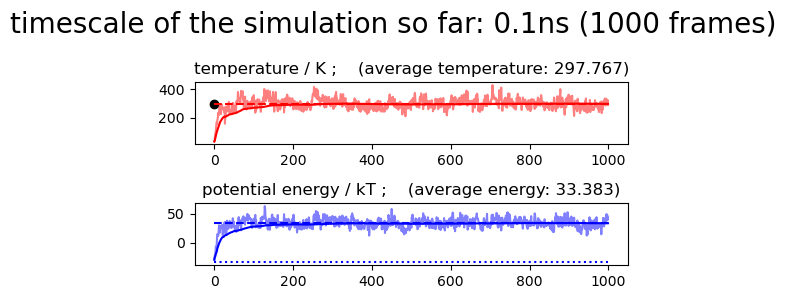

In [31]:
sc_GAFF.plot_simulation_info_(figsize=(5,3))

In [32]:
this.folders['data']

'./O/MM/molecules/benzene/data'

In [33]:
sc_GAFF.save_simulation_data_(this.folders['data']+'/unitcell_A_sampled_at_300K')

saved ./O/MM/molecules/benzene/data/unitcell_A_sampled_at_300K


In [34]:
! ls './O/MM/molecules/benzene/data'

NPT  unitcell_A_sampled_at_300K


In [35]:
sc_GAFF = SingleComponent(PDB = this.files['single_mol_main'],
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = FF_class,
               )

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_single_mol.pdb
n_molecules: 1



In [36]:
sc_GAFF.initialise_system_()
sc_GAFF.initialise_simulation_(timestep_ps=0.002, T=300)

# initialise_system:
! only one molecule in the system, setting non-bonded method to app.NoCutoff
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_benzene_gmx.top
replaced 1 line ( 145 ) 
 from: 
     MOL                  1
 to 
     MOL                  1
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_x_benzene_gmx.top
__________________________________________________________

no corrections to self.system
n_mol =  1, n_atoms_mol = 12, N = 12, n_DOF = 33 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before minimisation: 9.719490039844572 kT
u after  minimisation: 9.472794162980335 kT



In [37]:
sc_GAFF.run_simulation_(1000,50)

frame: 1000 T sampled:302.328 T expected:300

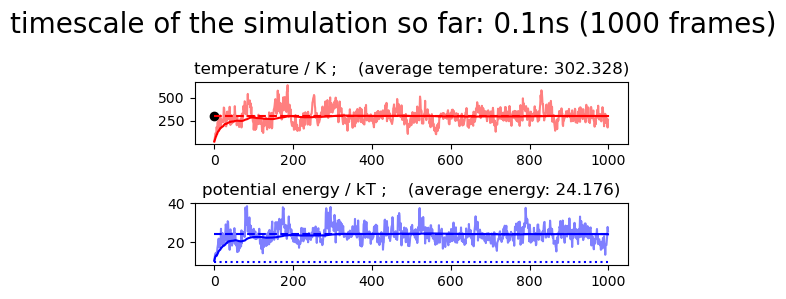

In [38]:
sc_GAFF.plot_simulation_info_(figsize=(5,3))

In [39]:
sc_GAFF.save_simulation_data_(this.folders['data']+'/single_molecule_sampled_at_300K')

saved ./O/MM/molecules/benzene/data/single_molecule_sampled_at_300K


In [40]:
! ls './O/MM/molecules/benzene/data'

NPT  single_molecule_sampled_at_300K  unitcell_A_sampled_at_300K


In [41]:
! ls './O/MM/molecules/benzene/'

benzene_A_unitcell.pdb	     benzene_A_unitcell_temp_reordered.pdb  data  temp
benzene_A_unitcell_temp.pdb  benzene_single_mol.pdb		    misc


In [43]:
n_mol = SingleComponent(PDB = this.files['A_unitcell'],
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = FF_class,
               ).n_mol

print('n_mol',n_mol)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_A_unitcell.pdb
n_molecules: 4

n_mol 4


In [45]:
mdtraj.load('./O/MM/molecules/benzene/benzene_A_unitcell.pdb').n_atoms//n_atoms_mol

4

In [47]:
get_unitcell_stack_order_(PDB_to_box_('./O/MM/molecules/benzene/benzene_A_unitcell.pdb'),
                          n_mol_unitcell=4, top_n=10)

{4: [1, 1, 1],
 8: [1, 1, 2],
 12: [1, 1, 3],
 16: [2, 1, 2],
 20: [1, 1, 5],
 24: [2, 1, 3],
 28: [1, 1, 7],
 32: [2, 2, 2],
 36: [3, 1, 3],
 40: [2, 1, 5]}

In [51]:
supercell = supercell_from_unitcell_('./O/MM/molecules/benzene/benzene_A_unitcell.pdb', cell=[2,2,2])[-1]

saved ./O/MM/molecules/benzene/benzene_A_unitcell_cell222.pdb


In [52]:
supercell 

'./O/MM/molecules/benzene/benzene_A_unitcell_cell222.pdb'

In [7]:
sc_GAFF = SingleComponent(PDB = supercell,
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = FF_class,
               )

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_A_unitcell_cell222.pdb
n_molecules: 32



In [8]:
np.min(np.diag(PDB_to_box_(supercell))/2)

0.6961

In [9]:
sc_GAFF.initialise_system_(PME_cutoff=0.6)
sc_GAFF.initialise_simulation_(timestep_ps=0.002, T=300, P=1)

# initialise_system:
set PME cutoff to: 0.6 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_benzene_gmx.top
replaced 1 line ( 145 ) 
 from: 
     MOL                  1
 to 
     MOL                  32
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/molecules/benzene/misc/x_x_benzene_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.57 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  32, n_atoms_mol = 12, N = 384, n_DOF = 1149 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 300 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minim

In [10]:
sc_GAFF.run_simulation_(1000,50)

frame: 1000 T sampled:296.103 T expected:300

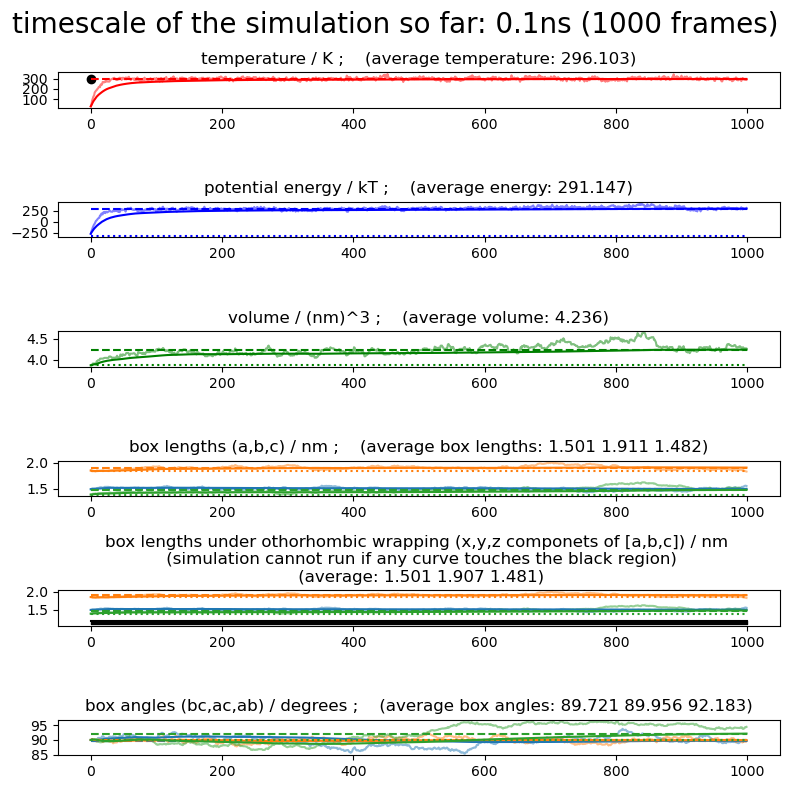

In [11]:
sc_GAFF.plot_simulation_info_(figsize=(8,8))

In [19]:
sc_GAFF.save_simulation_data_(this.folders['NPT']+'/supercell_A_222_sampled_at_300K_1atm')

saved ./O/MM/molecules/benzene/data/NPT/supercell_A_222_sampled_at_300K_1atm


# OPLS

In [ ]:
itp_file = '''
;
; GENERATED BY LigParGen Server
; Jorgensen Lab @ Yale University 
;
[ atomtypes ]
  opls_805  C805    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_800  H800     1.0080     0.000    A    2.42000E-01   1.25520E-01
  opls_807  C807    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_803  C803    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_811  H811     1.0080     0.000    A    2.42000E-01   1.25520E-01
  opls_810  H810     1.0080     0.000    A    2.42000E-01   1.25520E-01
  opls_802  C802    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_804  H804     1.0080     0.000    A    2.42000E-01   1.25520E-01
  opls_809  C809    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_806  H806     1.0080     0.000    A    2.42000E-01   1.25520E-01
  opls_801  C801    12.0110     0.000    A    3.55000E-01   2.92880E-01
  opls_808  H808     1.0080     0.000    A    2.42000E-01   1.25520E-01
[ moleculetype ]
; Name               nrexcl
UNK                  3
[ atoms ]
;   nr       type  resnr residue  atom   cgnr     charge       mass  
     1   opls_800      1    MOL   H00      1     0.1471     1.0080 
     2   opls_801      1    MOL   C01      1    -0.1477    12.0110 
     3   opls_802      1    MOL   C02      1    -0.1474    12.0110 
     4   opls_803      1    MOL   C03      1    -0.1473    12.0110 
     5   opls_804      1    MOL   H04      1     0.1474     1.0080 
     6   opls_805      1    MOL   C05      1    -0.1471    12.0110 
     7   opls_806      1    MOL   H06      1     0.1476     1.0080 
     8   opls_807      1    MOL   C07      1    -0.1472    12.0110 
     9   opls_808      1    MOL   H08      1     0.1474     1.0080 
    10   opls_809      1    MOL   C09      1    -0.1472    12.0110 
    11   opls_810      1    MOL   H0A      1     0.1473     1.0080 
    12   opls_811      1    MOL   H0B      1     0.1471     1.0080 
[ bonds ]
    2     1     1      0.1080 307105.600
    3     2     1      0.1400 392459.200
    4     2     1      0.1400 392459.200
    5     3     1      0.1080 307105.600
    6     3     1      0.1400 392459.200
    7     4     1      0.1080 307105.600
    8     4     1      0.1400 392459.200
    9     6     1      0.1080 307105.600
   10     6     1      0.1400 392459.200
   11     8     1      0.1080 307105.600
   12    10     1      0.1080 307105.600
   10     8     1      0.1400 392459.200

[ angles ]
;  ai    aj    ak funct            c0            c1            c2            c3 
    1     2     3     1    120.000    292.880
    1     2     4     1    120.000    292.880
    2     3     5     1    120.000    292.880
    2     3     6     1    120.000    527.184
    2     4     7     1    120.000    292.880
    2     4     8     1    120.000    527.184
    3     6     9     1    120.000    292.880
    3     6    10     1    120.000    527.184
    4     8    11     1    120.000    292.880
    6    10    12     1    120.000    292.880
    7     4     8     1    120.000    292.880
    6    10     8     1    120.000    527.184
    5     3     6     1    120.000    292.880
    3     2     4     1    120.000    527.184
    9     6    10     1    120.000    292.880
    4     8    10     1    120.000    527.184
    8    10    12     1    120.000    292.880
   10     8    11     1    120.000    292.880

[ dihedrals ]
; IMPROPER DIHEDRAL ANGLES 
;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5
     6     3     2     5    4        180.000     10.460     2  
     8     4     2     7    4        180.000     10.460     2  
    10     6     3     9    4        180.000     10.460     2  
     4     2     1     3    4        180.000     10.460     2  
    12    10     6     8    4        180.000     10.460     2  
    11     8     4    10    4        180.000     10.460     2  

[ dihedrals ]
; PROPER DIHEDRAL ANGLES
;  ai    aj    ak    al funct            c0            c1            c2            c3            c4            c5
    8    4    2    3        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    6   10    8    4        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   10    8    4    2        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    6    3    2    4        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    8   10    6    3        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   10    6    3    2        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    8    4    2    1        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    6    3    2    1        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   10    8    4    7        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   10    6    3    5        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    9    6   10    8        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   11    8   10    6        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   12   10    6    3        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   11    8    4    2        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   12   10    8    4        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    9    6    3    2        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    7    4    2    3        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    5    3    2    4        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    9    6    3    5        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   11    8    4    7        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   12   10    6    9        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    7    4    2    1        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
   12   10    8   11        3      30.334   0.000  -30.334  -0.000  -0.000   0.000
    5    3    2    1        3      30.334   0.000  -30.334  -0.000  -0.000   0.000

[ pairs ]
     1     5    1
     1     6    1
     1     7    1
     4     5    1
     1     8    1
     4     6    1
     3     7    1
     3     8    1
     2     9    1
     2    10    1
     2    11    1
     5     9    1
     5    10    1
     3    12    1
     4    12    1
     8     9    1
     7    10    1
     6    11    1
     7    11    1
     9    12    1
    11    12    1

'''

# no space at the top of the file.
gro_file = '''LIGPARGEN GENERATED GRO FILE
   12
    1MOL    H00    1   1.186   1.024   1.170
    1MOL    C01    2   1.214   1.123   1.205
    1MOL    C02    3   1.126   1.230   1.190
    1MOL    C03    4   1.339   1.142   1.265
    1MOL    H04    5   1.029   1.215   1.144
    1MOL    C05    6   1.162   1.357   1.236
    1MOL    H06    7   1.408   1.059   1.276
    1MOL    C07    8   1.376   1.270   1.310
    1MOL    H08    9   1.094   1.440   1.225
    1MOL    C09   10   1.287   1.377   1.296
    1MOL    H0A   11   1.472   1.285   1.357
    1MOL    H0B   12   1.315   1.475   1.331
   1.00000   1.00000   1.00000

'''

In [63]:
this.folders['misc']

'./O/MM/molecules/benzene/misc'

In [66]:
!ls './O/MM/molecules/benzene/misc'

benzene.inpcrd	 benzene_single_mol.frcmod  x_benzene_gmx.top
benzene.prmtop	 benzene_single_mol.mol2    x_x_benzene_gmx.top
benzene.tleap	 benzene_single_mol.pdb
benzene_gmx.top  benzene_single_mol.prepi


In [85]:
with open(f'./O/MM/molecules/benzene/misc/OPLS_{name}.itp','w') as file:
    file.write(itp_file)
    
with open(f'./O/MM/molecules/benzene/misc/OPLS_{name}.gro','w') as file:
    file.write(gro_file)

In [86]:
!ls './O/MM/molecules/benzene/misc'

OPLS_benzene.gro  benzene.tleap		     benzene_single_mol.pdb
OPLS_benzene.itp  benzene_gmx.top	     benzene_single_mol.prepi
benzene.inpcrd	  benzene_single_mol.frcmod  x_benzene_gmx.top
benzene.prmtop	  benzene_single_mol.mol2    x_x_benzene_gmx.top


In [13]:
sc_OPLS = SingleComponent(PDB = supercell,
               name = name,
               n_atoms_mol = n_atoms_mol,
               FF_class = OPLS_general,
               )

# initialise_object (SingleComponent) with OPLS FF, from the input file (PDB):
 ./O//MM/molecules/benzene/benzene_A_unitcell_cell222.pdb
n_molecules: 32
! using OPLS ff with permuation of atoms turned ON.
this assumes all molecules in the input PDB have the same permutation as the first molecule
'permuation of atoms turned ON' -> to reduce cost during run_simulation_ the method for saving xyz frames is slightly adjusted



In [14]:
sc_OPLS.initialise_system_(PME_cutoff=0.6)
sc_OPLS.initialise_simulation_(timestep_ps=0.002, T=300, P=1)

# initialise_system:
set PME cutoff to: 0.6 nm
removeCMMotion active: True
set SwitchingFunction to 0.95 * PME_cutoff = 0.57 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
no corrections to self.system
n_mol =  32, n_atoms_mol = 12, N = 384, n_DOF = 1149 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
setting barostat ( MonteCarloFlexibleBarostat ) to P = 1 atm, at 300 K, trying every 25 frames.
minimise = True, minimising potential energy (u):
u before minimisation: -262.8643181590687 kT
u after  minimisation: -275.71337494423403 kT



In [15]:
sc_OPLS.run_simulation_(1000,50)

frame: 1000 T sampled:296.679 T expected:300

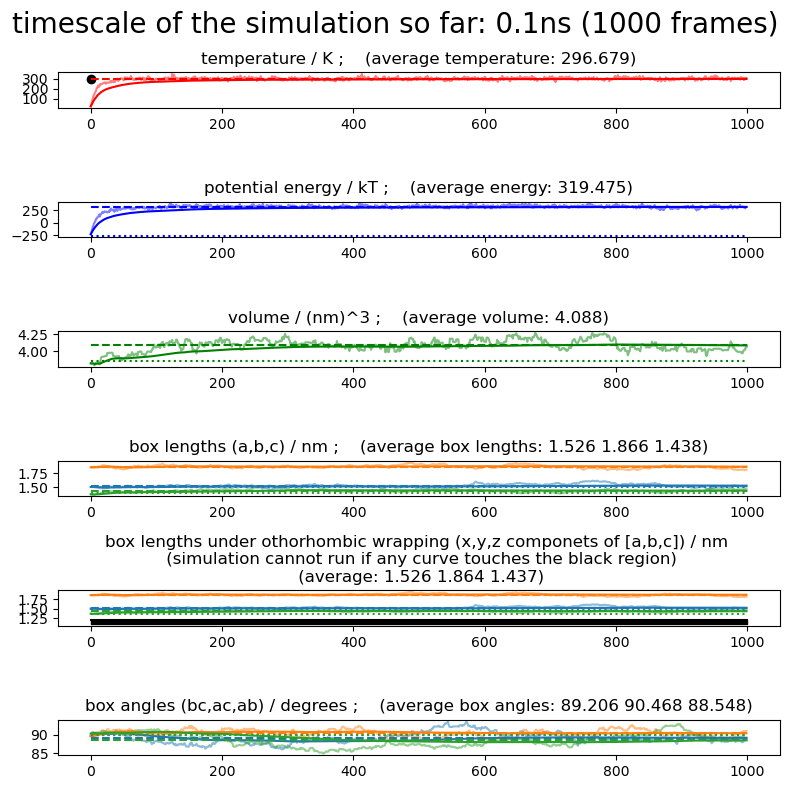

In [16]:
sc_OPLS.plot_simulation_info_(figsize=(8,8))

In [20]:
sc_OPLS.save_simulation_data_(this.folders['NPT']+'/OPLS_supercell_A_222_sampled_at_300K_1atm')

saved ./O/MM/molecules/benzene/data/NPT/OPLS_supercell_A_222_sampled_at_300K_1atm


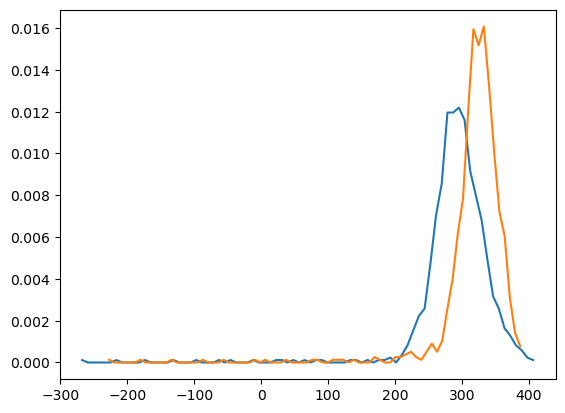

In [21]:
plot_1D_histogram_(sc_GAFF.u)
plot_1D_histogram_(sc_OPLS.u)

In [22]:
sc_GAFF.run_simulation_(5000,50)

frame: 6000 T sampled:299.606 T expected:300

In [23]:
sc_OPLS.run_simulation_(5000,50)

frame: 6000 T sampled:299.212 T expected:300

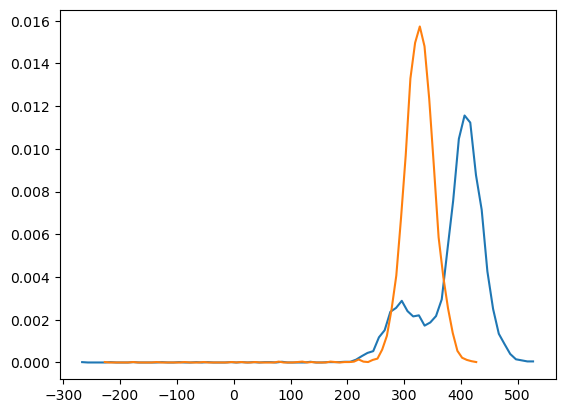

In [24]:
plot_1D_histogram_(sc_GAFF.u)
plot_1D_histogram_(sc_OPLS.u)

In [25]:
sc_GAFF.n_mol

32

In [26]:
sc_OPLS.n_mol

32

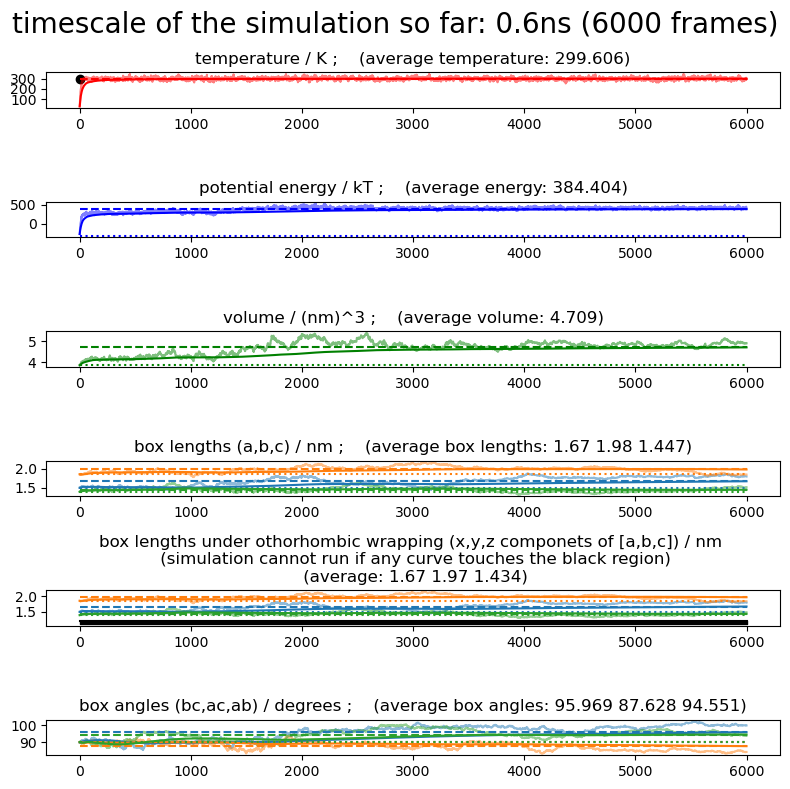

In [27]:
sc_GAFF.plot_simulation_info_(figsize=(8,8))

In [28]:
c = np.mod(np.einsum('oai,oij->oaj',sc_GAFF.xyz, np.linalg.inv(sc_GAFF.boxes)),1)

In [29]:
c.shape

(6000, 384, 3)

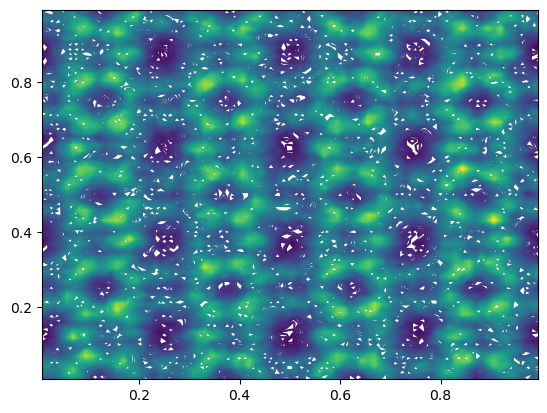

In [30]:
plot_2D_histogram_(c[:2000,...,0], c[:2000,...,1], bins=80, levels=100)

In [31]:
#sc_GAFF.save_gro_(r=sc_GAFF.xyz, b=sc_GAFF.boxes, name='check') # melt

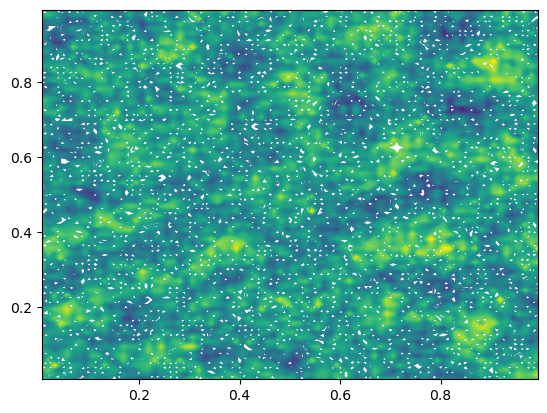

In [32]:
plot_2D_histogram_(c[2000:,...,0], c[2000:,...,1], bins=80, levels=100)

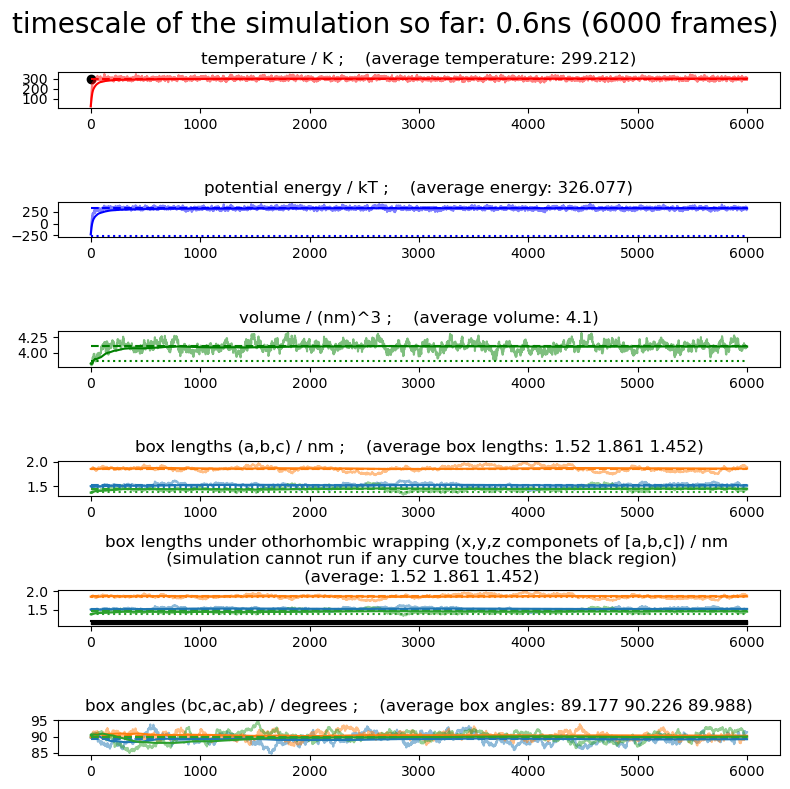

In [33]:
sc_OPLS.plot_simulation_info_(figsize=(8,8))

In [37]:
c = np.mod(np.einsum('oai,oij->oaj',sc_OPLS.xyz, np.linalg.inv(sc_OPLS.boxes)),1)

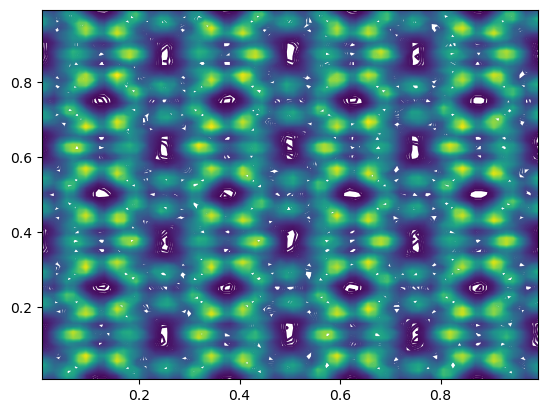

In [38]:
plot_2D_histogram_(c[...,0], c[...,1], bins=80, levels=100)

In [36]:
# OPLS more stable

(6000, 3, 3)

In [ ]:
# potential energy function works correctly:

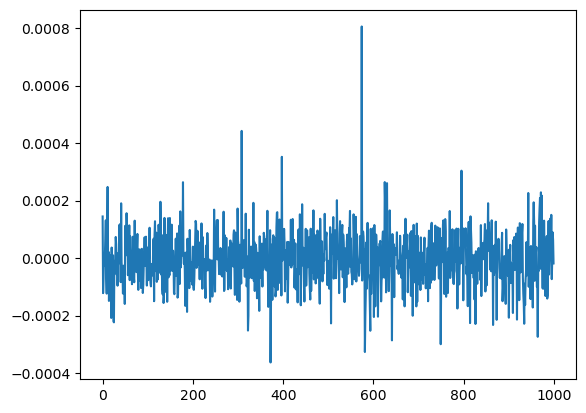

In [48]:
plt.plot(sc_OPLS.u_(sc_OPLS.xyz[:1000], b=sc_OPLS.boxes[:1000]) - sc_OPLS.u[:1000])

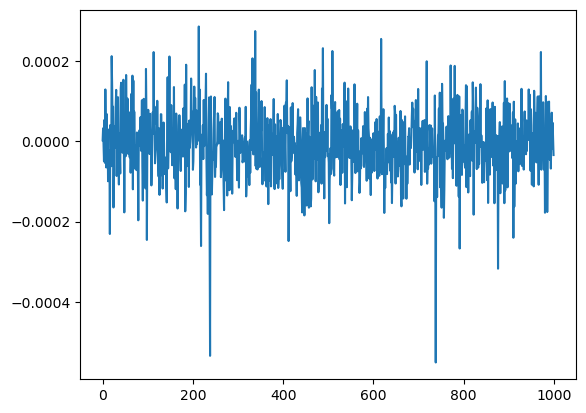

In [49]:
plt.plot(sc_GAFF.u_(sc_GAFF.xyz[:1000], b=sc_GAFF.boxes[:1000]) - sc_GAFF.u[:1000])

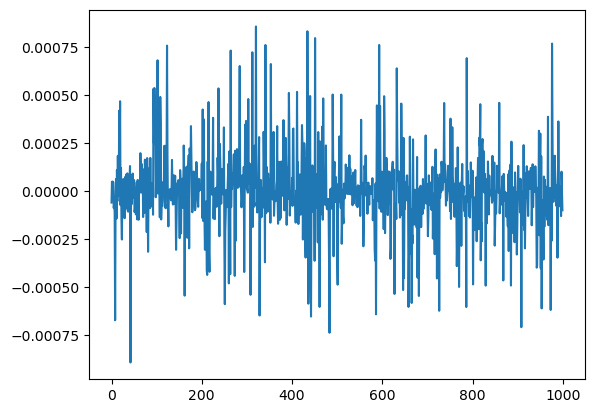

In [50]:
# liquid NPT correct also:
plt.plot(sc_GAFF.u_(sc_GAFF.xyz[-1000:], b=sc_GAFF.boxes[-1000:]) - sc_GAFF.u[-1000:])